In [205]:
## TASK 2:
# 1. A min-max rescaling
#data2 = data;
data[['pl','pw','sl','sw']] = MinMaxScaler((0, 1)).fit_transform(data[['pl','pw','sl','sw']])
# data[['pl','pw','sl','sw']] = normalize(data[['pl','pw','sl','sw']])


# 2. Detect Outliers
#sl_z = stats.zscore(data['sl'])
#print(np.sort(stats.zscore(data['sl'])))

# 3. Filter out the identified outliers
#data = data[np.abs(sl_z) < 2]


lof = LocalOutlierFactor(n_neighbors=5)

labels = lof.fit_predict(data[['pl','pw','sl','sw']])
scores = lof.negative_outlier_factor_
data = data[labels == 1]


In [206]:
## TASK 1:
kmeans = KMeans(n_clusters=3)
kmeans = kmeans.fit(data[['pl','pw','sl','sw']])

print(Counter(kmeans.labels_).keys())
print(Counter(kmeans.labels_).values())
print(kmeans.cluster_centers_)

plt.scatter(data["sw"], data["sl"], c=kmeans.labels_, cmap='viridis')
plt.show()


Clusters found: 1


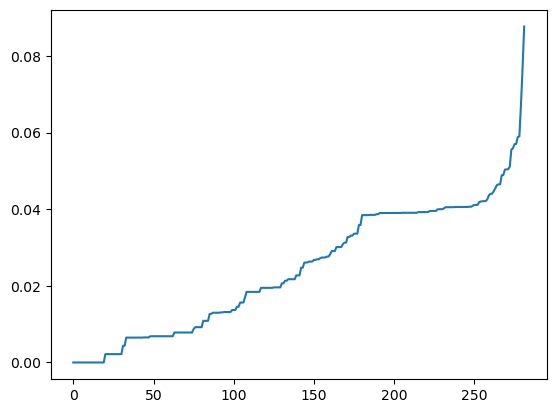

In [209]:
## TASK 5:
clustering = DBSCAN(eps=284, min_samples=5).fit(data[['pl','pw','sl','sw']])
# 1. How many clusters does DB-SCAN find using eps=1, min_samples=5?
print(f"Clusters found: {len(Counter(clustering.labels_).keys())}")
# 2. Leaving min_samples unchanged (5), can you manually find a value for epsilon
# leading to two clusters (plus noise)?
def k_distances2(X,n):
    neighbors = NearestNeighbors(n_neighbors=n)
    neighbors_fit = neighbors.fit(X)
    distances, indices = neighbors_fit.kneighbors(X)
    return distances, indices

# TODO: add your parameters here.
# data -- your normalized dataset
# k    -- k-th neighbour. By default, k=count(features)+1
distances, indices = k_distances2(data[['pl','pw','sl','sw']], 5)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()